## SANGAMESH

### Project - 250 - Resume classification
 #### Buisness Objective - The document classification solution should significantly reduce the manual human effort in the HRM. it should achieve a higher level of accuracy and automation with minimal human intervention.


### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import string as str
import os
import spacy
import docx2txt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

# About Dataset

In [2]:
f_path = r'Resumes/'
doc_file=[]
pdf_file=[]
docx_file=[]
folder_name=[]

for folder in os.listdir(f_path):
    folder_path = f_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(file)
        elif file.endswith('.docx'):
                docx_file.append(file)
                folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [3]:
print('Number of .doc Files = {}'.format(len(doc_file)),'\n'
      'number of .pdf Files = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files = 26 
number of .pdf Files = 1 
Number of .docx Files = 52


In [4]:
print("Total Number of Files=",len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files= 79


In [5]:
rcParams={'xtick.labelsize':'13','ytick.labelsize':'13','axes.labelsize':'17'}

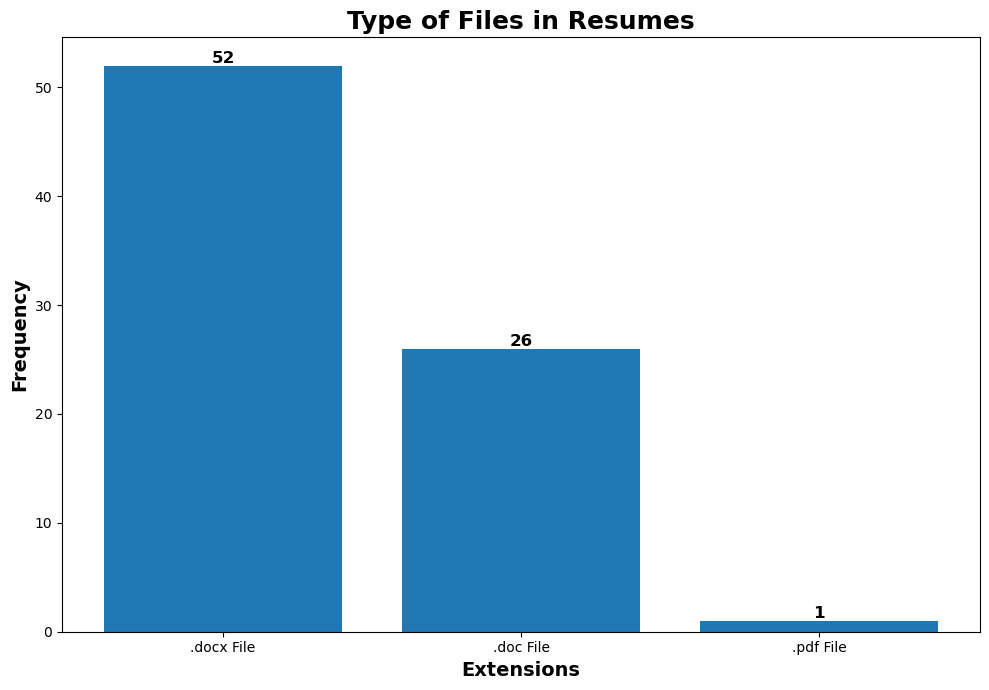

In [6]:
fig,ax = plt.subplots(figsize=(10,7),dpi=100)
extensions = ['.docx File','.doc File','.pdf File']
counts = [len(docx_file),len(doc_file),len(pdf_file)]
ax.bar(extensions,counts)
ax.set_xlabel('Extensions',size=14,fontweight='bold')
ax.set_ylabel('Frequency',size=14,fontweight='bold')
plt.title('Type of Files in Resumes',fontsize=18,fontweight='bold')

for i in ax.containers:
    ax.bar_label(i,color='black',fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()

# Resumes Extracted by Profile Category

In [7]:
f_path = r'Resumes/'
file_name = []
profile = []

for folder in os.listdir(f_path):
    folder_path = f_path + folder
    for file in os.listdir(folder_path):
        if file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [8]:
r_data = pd.DataFrame()
r_data['Profile'] = profile
r_data['Resumes'] = file_name
r_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [9]:
r_data.Profile.value_counts().index

Index(['React JS Developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object')

In [10]:
r_data.Profile.value_counts()

React JS Developer                 24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Profile, dtype: int64

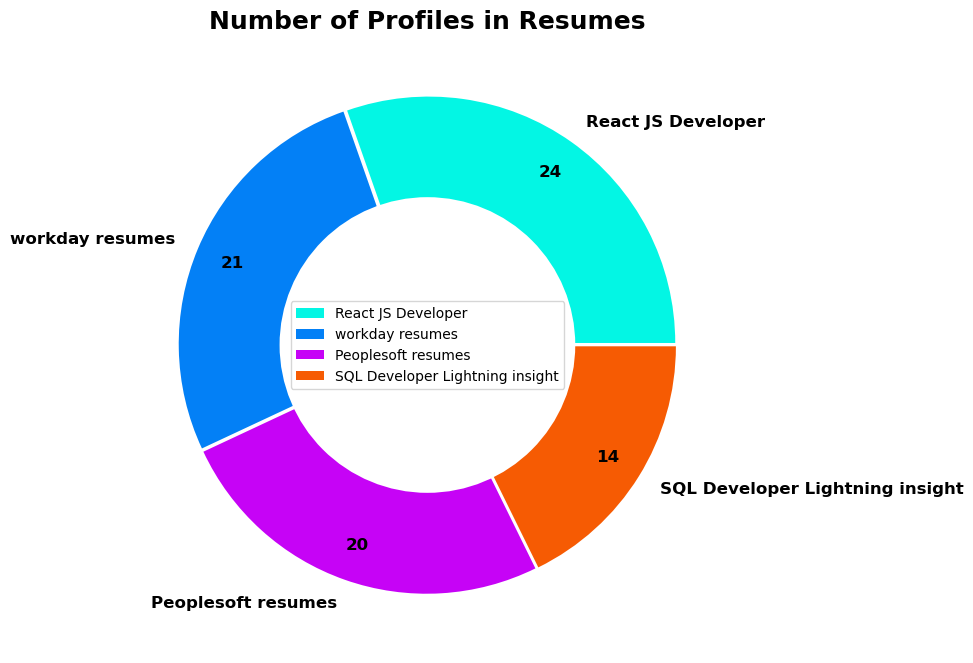

In [11]:
sizes = r_data['Profile'].value_counts()
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']
explode = (0.01, 0.01, 0.01, 0.01)
fig = plt.figure(figsize=(8,8))
plt.pie(sizes, colors=colors, labels=sizes.index, autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100), pctdistance=0.85, explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})
plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.legend(sizes.index, loc='center')
plt.show()


In [12]:
os.listdir('resume_docx/')

['Peoplesoft resumes',
 'React JS Developer',
 'SQL Developer Lightning insight',
 'workday resumes']

In [13]:
def print_file_names(directory):
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory,filename)):
            print(filename)
            
directory="resume_docx/SQL Developer Lightning insight"
print_file_names(directory)

Anil kumar.docx
AradhanaTripathi[4_0].docx
Buddha Vamsi.docx
kamballapradeep.docx
Nazeer Basha.docx
Neeraj Mishra.docx
premsai.docx
Priyanka L.docx
PSyamKumar[2_3].docx
Rajupavanakumari[2_10].docx
Ramalakshmi K.docx
RameshNataru[3_4].docx
Tatikonda Kiran Kumar.docx
Vinod B.docx


In [14]:
import textract

In [15]:
file1=[]
category1=[]
path1='resume_docx/Peoplesoft resumes/'
for i in os.listdir(path1):
    if i.endswith('.docx'):
        os.path.join(path1,i)
        file1.append((textract.process(os.path.join(path1,i))).decode('utf-8'))
        category1.append('Peoplesoft resumes')

In [16]:
data1=pd.DataFrame(data=file1,columns=['Raw'])
data1['CATEGORY1']=category1
data1

,Raw,CATEGORY1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,Peoplesoft resumes
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes
8,Vinod Akkala ...,Peoplesoft resumes
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,Peoplesoft resumes


In [17]:
file2=[]
category2=[]
path2='resume_docx/React JS Developer/'
for i in os.listdir(path2):
    if i.endswith('.docx'):
        os.path.join(path2,i)
        file2.append((textract.process(os.path.join(path2,i))).decode('utf-8'))
        category2.append('React JS Developer')

In [18]:
data2=pd.DataFrame(data=file2,columns=['Raw'])
data2['CATEGORY2']=category2
data2

,Raw,CATEGORY2
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer


In [19]:
file3=[]
category3=[]
path3='resume_docx/SQL Developer Lightning insight/'
for i in os.listdir(path3):
    if i.endswith('.docx'):
        os.path.join(path3,i)
        file3.append((textract.process(os.path.join(path3,i))).decode('utf-8'))
        category3.append('SQL Developer Lightning insight')

In [20]:
data3=pd.DataFrame(data=file3,columns=['Raw'])
data3['CATEGORY3']=category3
data3

,Raw,CATEGORY3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning insight
2,BUDDHA VAMSI ...,SQL Developer Lightning insight
3,KAMBALLA PRADEEP ...,SQL Developer Lightning insight
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer Lightning insight
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning insight
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer Lightning insight
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning insight
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning insight


In [21]:
file4=[]
category4=[]
path4='resume_docx/workday resumes/'
for i in os.listdir(path4):
    if i.endswith('.docx'):
        os.path.join(path4,i)
        file4.append((textract.process(os.path.join(path4,i))).decode('utf-8'))
        category4.append('workday resumes')

In [22]:
data4=pd.DataFrame(data=file4,columns=['Raw'])
data4['CATEGORY4']=category4
data4

,Raw,CATEGORY4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday resumes
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday resumes
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday resumes
3,Harikrishna Akula ...,workday resumes
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday resumes
5,G Himaja\n\n ...,workday resumes
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,workday resumes
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday resumes
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,workday resumes
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday resumes


In [23]:
merged=pd.concat([data1,data2,data3,data4])
merged.reset_index(drop=True,inplace=True)
merged

,Raw,CATEGORY1,CATEGORY2,CATEGORY3,CATEGORY4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes,NaN,NaN,NaN
...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,workday resumes
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,workday resumes
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,workday resumes


Till here we extracted all resumes and concated the data

In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Raw        79 non-null     object
 1   CATEGORY1  20 non-null     object
 2   CATEGORY2  24 non-null     object
 3   CATEGORY3  14 non-null     object
 4   CATEGORY4  21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [25]:
merged['Category']=category1+category2+category3+category4
merged

,Raw,CATEGORY1,CATEGORY2,CATEGORY3,CATEGORY4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
...,...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,workday resumes,workday resumes
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,workday resumes,workday resumes
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,workday resumes,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,workday resumes,workday resumes


Here we merged all the categories

In [26]:
merged.drop(['CATEGORY1','CATEGORY2','CATEGORY3','CATEGORY4'],axis=1,inplace=True)

In [27]:
merged

,Raw,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,workday resumes
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


dropped unnecesary columns which are having null values

In [28]:
merged["Raw"][8]

'Vinod Akkala                                                              \n\nPeopleSoft DBA Admin.                                                        \n\n\n\nProfessional Summary:\n\n\n\nHaving 7+years of experience in PeopleSoft Admin/Dba implementation and Supporting PeopleSoft applications Like HCM/FSCM modules on Oracle Database and their supporting operating systems. \n\nImplementing PeopleSoft Internet architecture(PIA) on Demo,Dev,Test,Production Instances.\n\nExperience in configuration of Application Server Domains and Process Scheduler Setup.\n\nPerformed Installation, configuration and maintained Oracle 10g/11g/12C databases on UNIX, Linux and NT Servers.\n\nExperience in Project Migration and Data Migration.\n\nExperience in generating Compare Reports between various environments.\n\nWorked on applying Patches, Bundles and Tax Updates.\n\nConfiguring Change Assistant to apply Bundles and Tax updates.\n\nMaintaining integrity and internal consistency of the database us

#### Creating new CSV file

In [29]:
merged.to_csv('new_data.csv',index=False)

In [30]:
new=pd.read_csv('new_data.csv')
new

,Raw,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,workday resumes
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


In [31]:
new.isnull().sum()

Raw         0
Category    0
dtype: int64

#### word count of each entry in the "Raw_Data" column.

In [32]:

new['Word_Count'] = new['Raw'].str.split().apply(len)
new[['Raw','Word_Count']]


,Raw,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1017
1,G. Ananda Rayudu \n\n\t\t https://www.li...,991
2,PeopleSoft Database Administrator\n\n ...,786
3,Classification: Internal\n\nClassification: In...,623
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",656
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,920
75,Srikanth (WORKDAY hCM Consultant)\t ...,903
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1136
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,881


#### character count of each entry in the "Raw_Data" column.

In [33]:

new['Char_Count'] = new['Raw'].str.len()
new[['Raw','Char_Count']]

,Raw,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,G. Ananda Rayudu \n\n\t\t https://www.li...,8318
2,PeopleSoft Database Administrator\n\n ...,6900
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,7030
75,Srikanth (WORKDAY hCM Consultant)\t ...,6737
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,8329
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,6836


In [34]:
from nltk.corpus import stopwords

In [35]:
stop = stopwords.words('english')
new['Stopwords'] = new['Raw'].apply(lambda x: len([x for x in x.split() if x in stop]))
new[['Raw','Stopwords']]

,Raw,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,G. Ananda Rayudu \n\n\t\t https://www.li...,186
2,PeopleSoft Database Administrator\n\n ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",123
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,197
75,Srikanth (WORKDAY hCM Consultant)\t ...,194
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,236
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,193


imports the stopwords corpus from the NLTK (Natural Language Toolkit) library.

Stopwords are common words that often do not carry significant meaning in text analysis tasks. Examples of stopwords include "a," "an," "the," "is," "are," "in," "on," and so on.

By importing the stopwords corpus from NLTK, you gain access to a collection of stopwords that can be used for tasks such as text preprocessing, feature extraction, or filtering out irrelevant words from text data. NLTK provides stopwords for various languages, allowing you to handle text data in different languages efficiently.

After importing the stopwords corpus, you can use the NLTK library to access and utilize the stopwords as per your specific requirements in your NLP tasks.

In [36]:
new['Numerics'] = new['Raw'].str.findall(r'\b\d+\b').apply(len)
new[['Raw', 'Numerics']]


,Raw,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,85
1,G. Ananda Rayudu \n\n\t\t https://www.li...,108
2,PeopleSoft Database Administrator\n\n ...,62
3,Classification: Internal\n\nClassification: In...,71
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",43
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,13
75,Srikanth (WORKDAY hCM Consultant)\t ...,13
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,16
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,22


alculates the count of numeric values for each entry in the "Raw_Data" column and adds it as a new column in the DataFrame, allowing you to analyze the frequency of numeric values alongside the raw data.

In [37]:
new

,Raw,Category,Word_Count,Char_Count,Stopwords,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,1017,8010,190,85
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes,991,8318,186,108
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes,786,6900,177,62
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,623,4917,114,71
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes,656,5196,123,43
...,...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,workday resumes,920,7030,197,13
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes,903,6737,194,13
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes,1136,8329,236,16
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes,881,6836,193,22


### Creating new csv file of Counts

In [38]:
new.to_csv('counts.csv',index=False)

# TEXT PREPROCESSING 

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from bs4 import BeautifulSoup

In [40]:
df=pd.read_csv('new_data.csv')
df

,Raw,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,workday resumes
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


In [41]:
df.shape

(79, 2)

In [42]:
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

def cleanResume(resumeText):
    resumeText = resumeText.lower()
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub(r'[0-9]+', '', resumeText)  # remove numbers
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(resumeText)
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in tokens if len(w) > 1 if not w in stop_words]
    return ' '.join(filtered_words)

defines a function called cleanResume that takes a resumeText parameter representing the text of a resume. This function performs several cleaning operations on the resume text to preprocess it for further analysis

The cleanResume function performs common text preprocessing steps, such as removing URLs, hashtags, mentions, punctuation, numbers, non-ASCII characters, and stopwords. It also tokenizes the text and filters out certain words based on length and stopword status. The resulting cleaned resume text can be used for further NLP analysis or modeling tasks.

In [43]:
df['cleaned']=df.Raw.apply(lambda x: cleanResume(x))
print(df['cleaned'][5])

sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks th standard scored th standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ut ions augus april voya financial insurance us client project deals support managing finance applications project experience project name

In [44]:
df

,Raw,Category,cleaned
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes,ananda rayudu profile summary years experience...
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,classification internal classification interna...
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,workday resumes,workday integration consultant name sri krishn...
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes,srikanth workday hcm consultant seeking suitab...
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes,venkateswarlu workday consultant professional ...


In [45]:
df.drop(['Raw'],axis=1,inplace=True)
df

,Category,cleaned
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,ananda rayudu profile summary years experience...
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,classification internal classification interna...
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,workday resumes,workday integration consultant name sri krishn...
75,workday resumes,srikanth workday hcm consultant seeking suitab...
76,workday resumes,workday hcm fcm name kumar role workday consul...
77,workday resumes,venkateswarlu workday consultant professional ...


### Data is cleaned

### Saving cleaned data as final data in csv

In [46]:
df.to_csv('finals.csv',index=False)

In [47]:
final_data=pd.read_csv('finals.csv')
final_data

,Category,cleaned
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,ananda rayudu profile summary years experience...
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,classification internal classification interna...
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,workday resumes,workday integration consultant name sri krishn...
75,workday resumes,srikanth workday hcm consultant seeking suitab...
76,workday resumes,workday hcm fcm name kumar role workday consul...
77,workday resumes,venkateswarlu workday consultant professional ...


# Finding Most Common Words

In [48]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['cleaned'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('reports', 326), ('project', 325), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('core', 128), ('studio', 128), ('work', 124), ('custom', 124), ('js', 123

In [49]:
import string

In [50]:
# !python -m spacy download en_core_web_lg

In [51]:
nlp = spacy.load('en_core_web_lg')

sp = cleanedSentences[1300:5200]
sp2 = nlp(sp)
spacy.displacy.render(sp2, style= 'ent', jupyter= True)

#### Here we used spacy to visualize named entities in a range of cleaned sentences.

In [52]:
for token in sp2[:30]:
    print(token,token.pos_)  

rked ADJ
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


#### Here we printed the tokens and their corresponding part-of-speech

In [53]:
tokenization = cleanedSentences
nlp2 = nlp(tokenization)
noun_verbs = [token.text for token in nlp2 if token.pos_ in ('NOUN','VERB')]
print(noun_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

#### Here we extracting the tokens that have the parts of speech tags NOUN and VERB.

In [54]:
cv = CountVectorizer()
X = cv.fit_transform(noun_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,540
1,application,417
2,using,386
3,workday,350
4,reports,326
5,data,299
6,project,287
7,business,260
8,server,241
9,web,234


### CountVectorizer from scikit-learn to count the frequency of words in the noun_verbs list.


# pip install wordcloud

In [55]:
from wordcloud import WordCloud, STOPWORDS

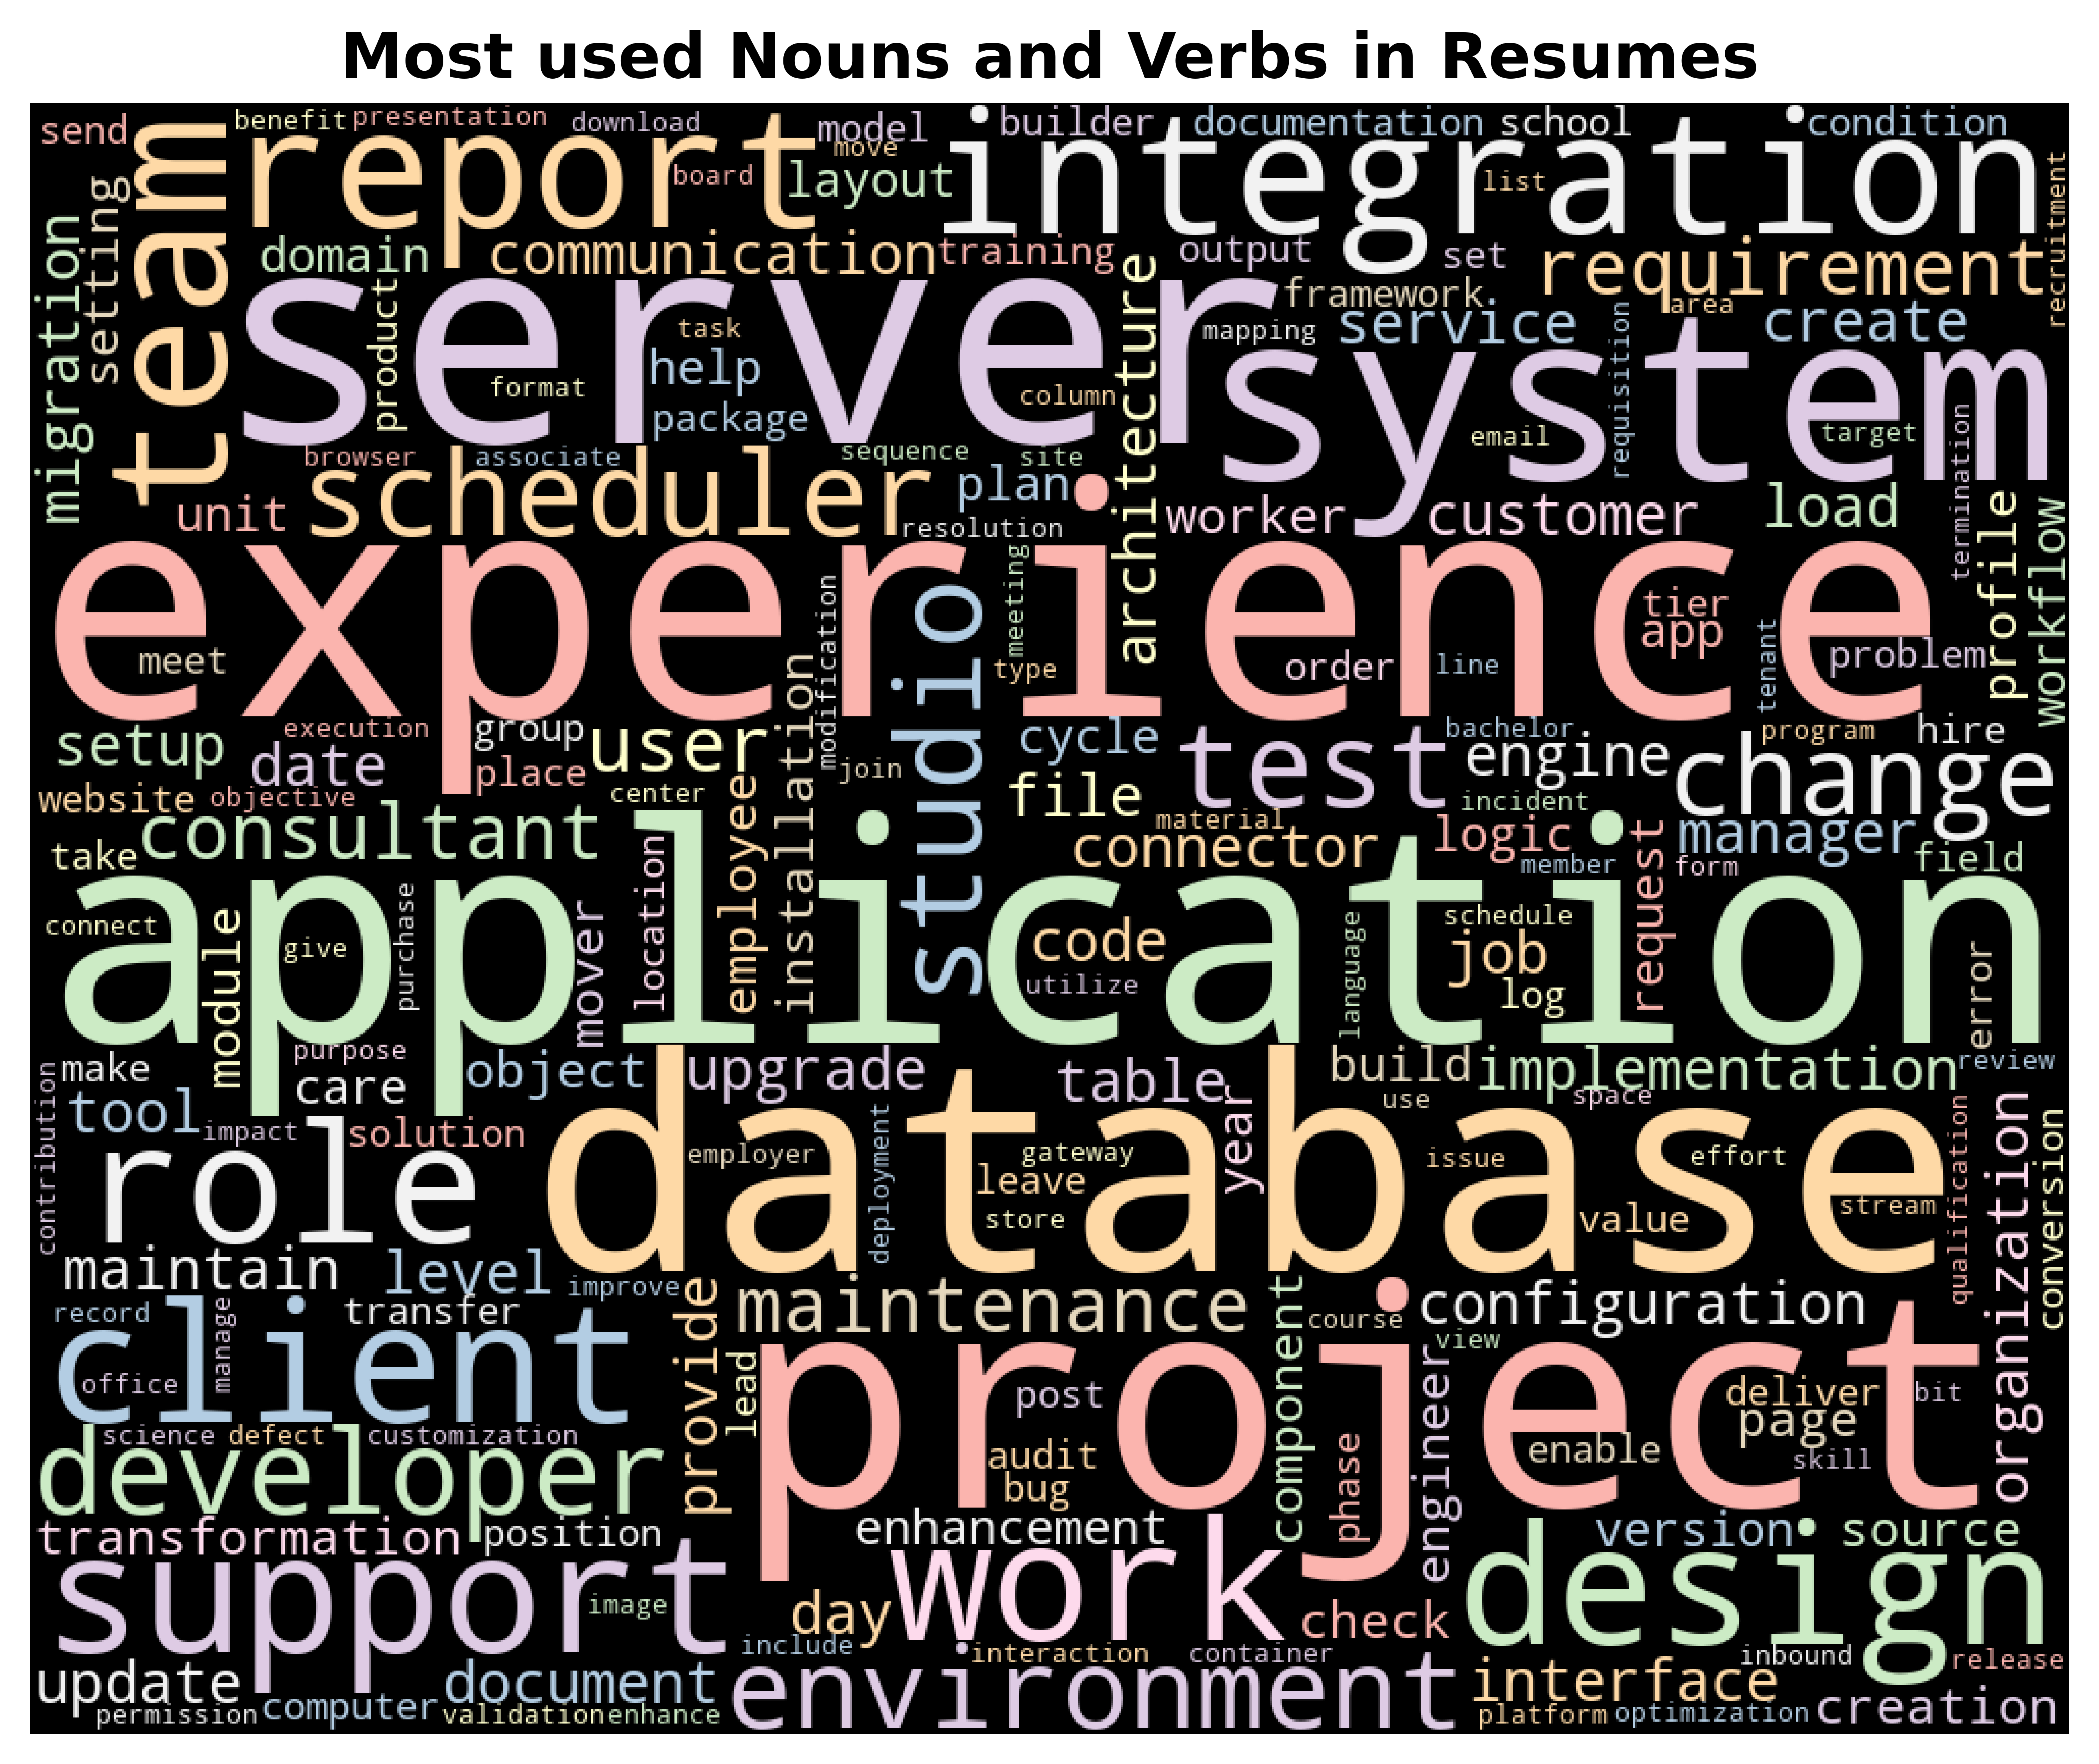

In [56]:
text = " ".join(cat for cat in wd_df.Words)
WORDCLOUD1 = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10,7), dpi=800) 
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(WORDCLOUD1)
plt.axis("off")
WORDCLOUD1.to_file('Wordcloud.png')
plt.show()

Here we created Word cloud

# MODEL BUILDING

In [57]:
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [58]:
resume_data = pd.read_csv('finals.csv')
resume_data.head()

,Category,cleaned
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,ananda rayudu profile summary years experience...
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,classification internal classification interna...
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...


# Data prerocessing

label encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,cleaned,LebelEncoding
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...,0
1,Peoplesoft resumes,ananda rayudu profile summary years experience...,0
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...,0
3,Peoplesoft resumes,classification internal classification interna...,0
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
74,workday resumes,workday integration consultant name sri krishn...,3
75,workday resumes,srikanth workday hcm consultant seeking suitab...,3
76,workday resumes,workday hcm fcm name kumar role workday consul...,3
77,workday resumes,venkateswarlu workday consultant professional ...,3


Label encoding is a process of converting categorical labels or variables into numeric values. It is commonly used in machine learning when dealing with categorical data as many algorithms require numerical inputs.

In [60]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [61]:
resume_data.isnull().sum()

Category         0
cleaned          0
LebelEncoding    0
dtype: int64

# Model building

# Train and Test split

In [62]:
x = resume_data['cleaned'].values
y = resume_data['Category'].values

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

## TF - IDF vectorization
TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a popular technique used to convert text data into numerical feature vectors. It aims to reflect the importance of a word in a document within a collection of documents.


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [65]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [66]:
x_train.shape, x_test.shape

((59, 3721), (20, 3721))

In [67]:
print(y_train),print(y_test)

['Peoplesoft resumes' 'React JS Developer' 'Peoplesoft resumes'
 'workday resumes' 'SQL Developer Lightning insight'
 'SQL Developer Lightning insight' 'React JS Developer'
 'Peoplesoft resumes' 'React JS Developer' 'Peoplesoft resumes'
 'React JS Developer' 'SQL Developer Lightning insight'
 'React JS Developer' 'React JS Developer' 'workday resumes'
 'React JS Developer' 'SQL Developer Lightning insight'
 'React JS Developer' 'Peoplesoft resumes' 'React JS Developer'
 'React JS Developer' 'workday resumes' 'Peoplesoft resumes'
 'Peoplesoft resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'workday resumes' 'workday resumes'
 'workday resumes' 'React JS Developer' 'workday resumes'
 'React JS Developer' 'SQL Developer Lightning insight' 'workday resumes'
 'React JS Developer' 'workday resumes' 'SQL Developer Lightning insight'
 'workday resumes' 'Peoplesoft resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'workday resumes'
 'SQL Deve

(None, None)

# KNN classifier

In [68]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.64
Accuracy of  test set    : 0.60
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.50      0.20      0.29         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       0.00      0.00      0.00         4
                workday resumes       0.42      1.00      0.59         5

                       accuracy                           0.60        20
                      macro avg       0.48      0.55      0.47        20
                   weighted avg       0.53      0.60      0.52        20




# Decision Tree

In [69]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           1.00        20
                      macro avg       1.00      1.00      1.00        20
                   weighted avg       1.00      1.00      1.00        20




# Random Forest

In [70]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           1.00        20
                      macro avg       1.00      1.00      1.00        20
                   weighted avg       1.00      1.00      1.00        20




# Support Vectore Machine

In [71]:
model_svm= SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
             React JS Developer       0.86      1.00      0.92         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.95        20
                      macro avg       0.96      0.95      0.95        20
                   weighted avg       0.96      0.95      0.95        20




# Logistic Regression

In [72]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
             React JS Developer       0.86      1.00      0.92         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.95        20
                      macro avg       0.96      0.95      0.95        20
                   weighted avg       0.96      0.95      0.95        20




# Bagging Classifier

In [73]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           1.00        20
                      macro avg       1.00      1.00      1.00        20
                   weighted avg       1.00      1.00      1.00        20




# AdaBoost

In [74]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.75
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.00      0.00      0.00         5
             React JS Developer       0.55      1.00      0.71         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.75        20
                      macro avg       0.64      0.75      0.68        20
                   weighted avg       0.61      0.75      0.66        20




# Gradient Boosting

In [75]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           1.00        20
                      macro avg       1.00      1.00      1.00        20
                   weighted avg       1.00      1.00      1.00        20




# Naive Bayes 

In [76]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           1.00        20
                      macro avg       1.00      1.00      1.00        20
                   weighted avg       1.00      1.00      1.00        20




# Model Evaluation

In [77]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.644068,0.60,0.48,0.55,0.47
1,DecisionTree Classifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.95,0.96,0.95,0.95
4,Logistic Regression,1.000000,0.95,0.96,0.95,0.95
5,Bagging Classifier,1.000000,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.745763,0.75,0.64,0.75,0.68
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [78]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

# Train and Test Accuracy Plot

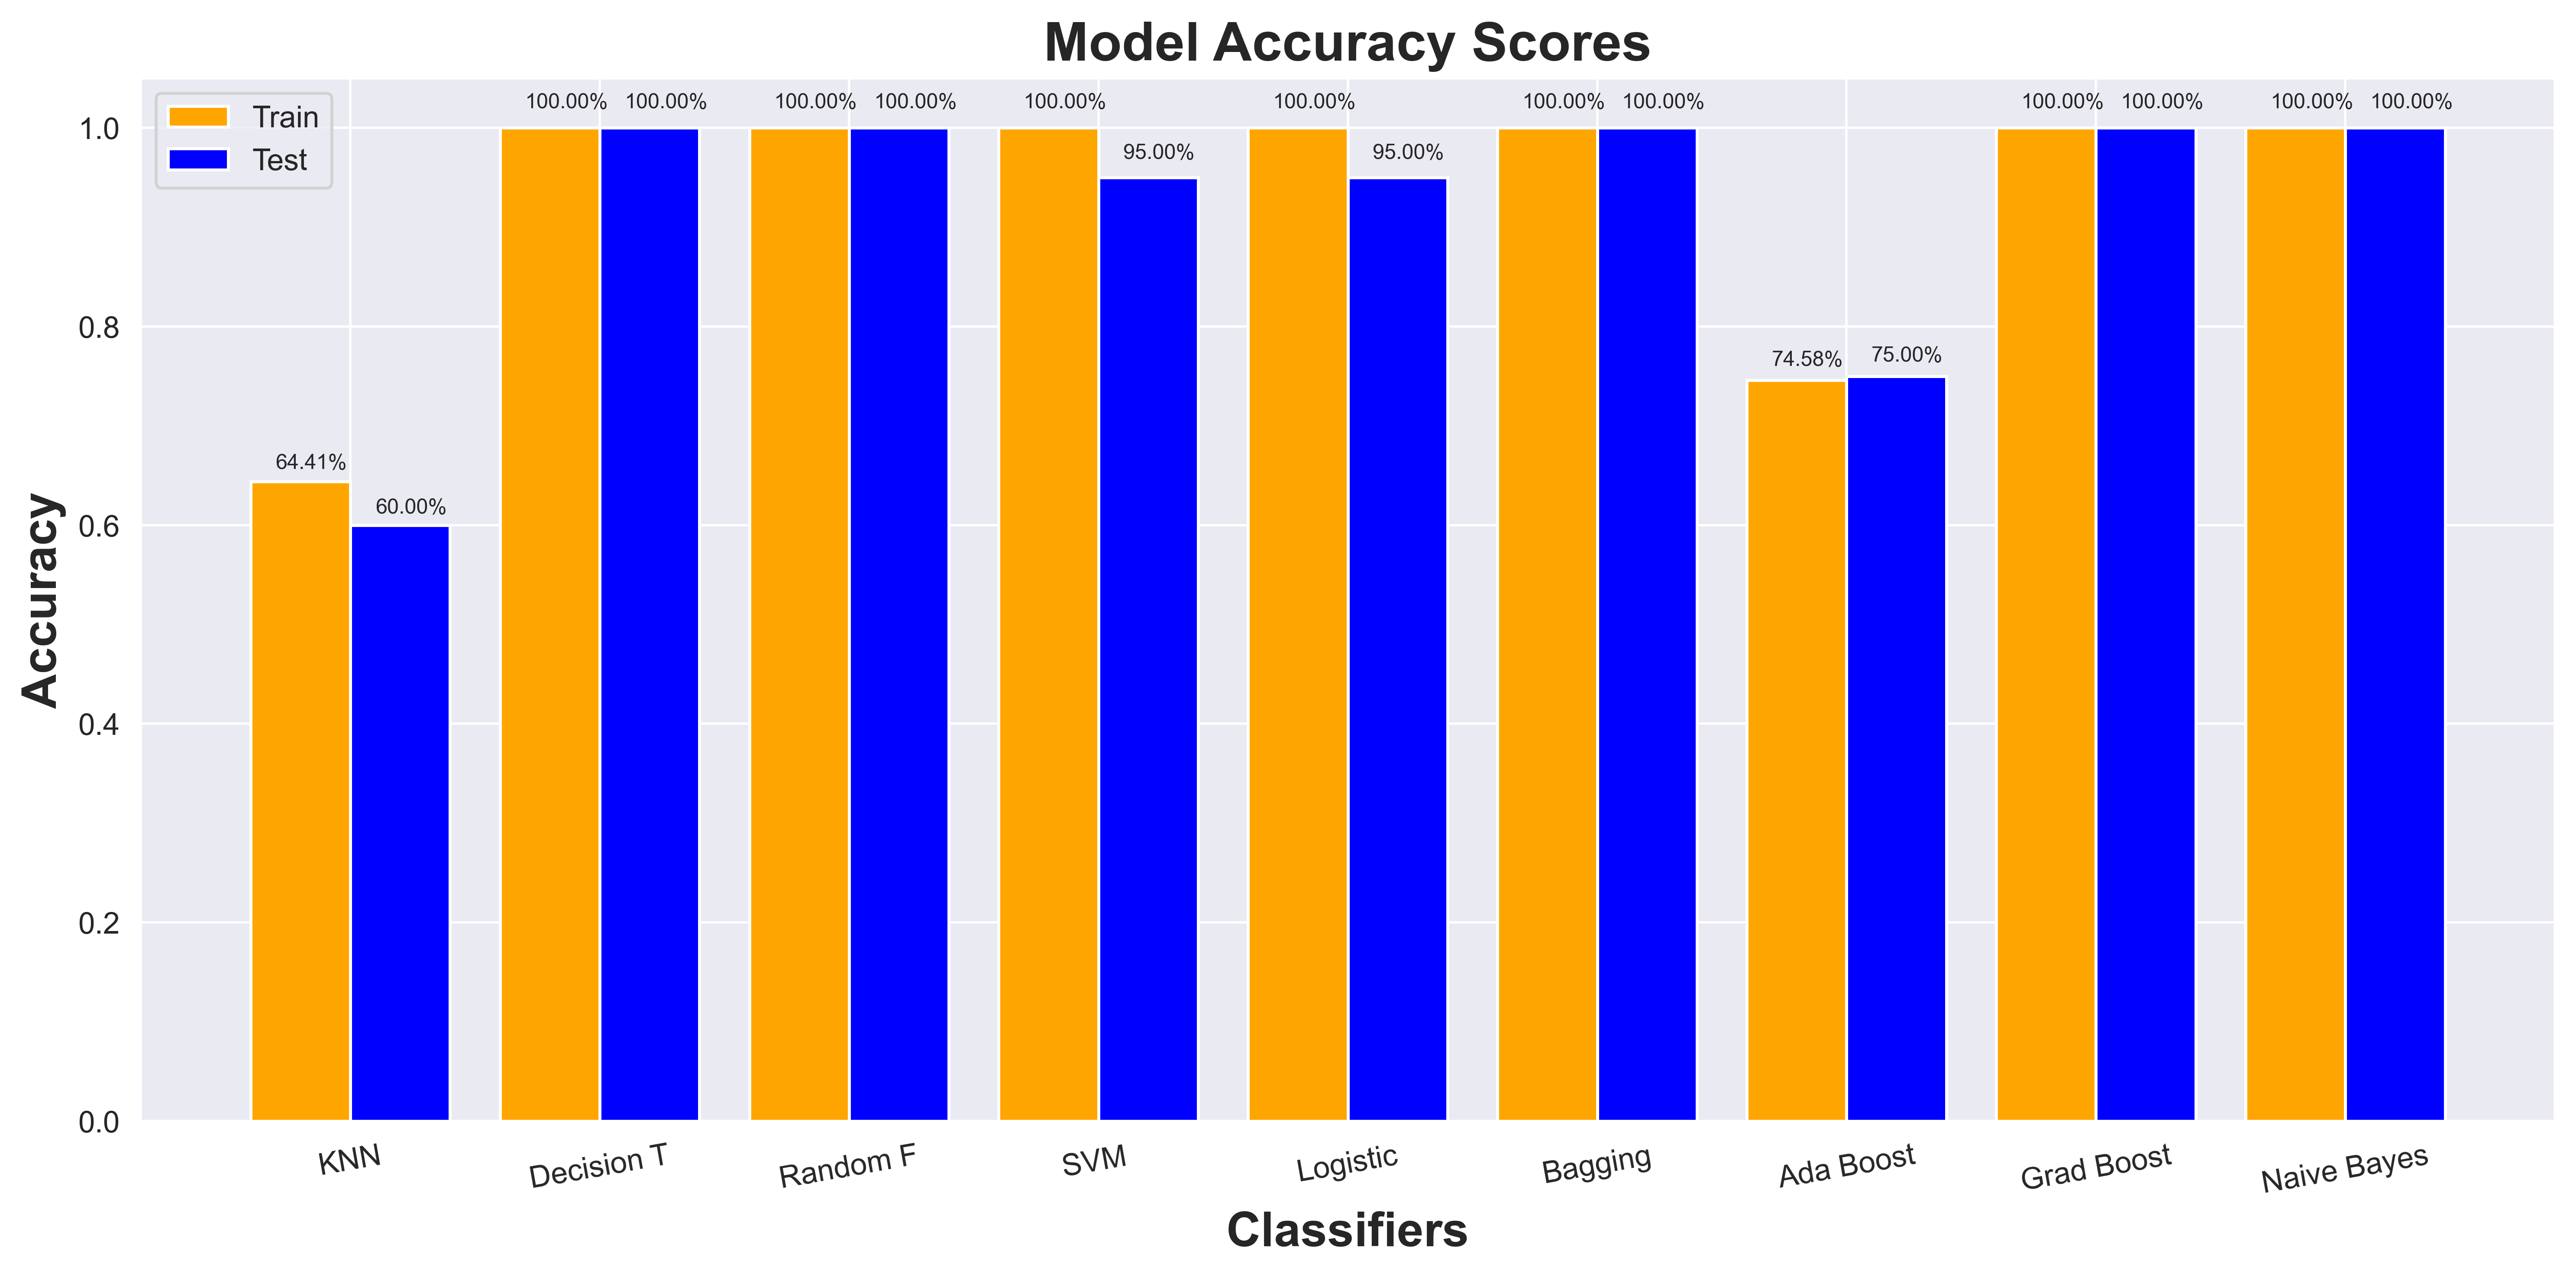

In [79]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Mod_Acc_Bar', dpi = 500)

# Deployment

In [80]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [81]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))